# Mobile Customer Churn

In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn.  Churn is where
a customer leaves the mobile provider.   The goal is to build a simple predictive model to predict churn from available features. 

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus.  The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv` (store these in the `files` folder in your project).

Your high level goal in this notebook is to try to build and evaluate a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

__Note:__ you are not being evaluated on the _accuracy_ of the model but on the _process_ that you use to generate it.  You can use a simple model such as Logistic Regression for this task or try one of the more advanced methods covered in recent weeks.  Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.  

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

In [14]:
churn = pd.read_csv("files/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')
churn.head()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,...,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
INDEX,,,,,,,,,,,,,,,,,,,,,
1,1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,...,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,NaN,NaN,NaN
2,2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,...,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,NaN,NaN,NaN
3,5,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,...,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,NaN,NaN,NaN
4,6,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,...,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,NaN,NaN,NaN
5,8,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,...,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,NaN,NaN,NaN


In [15]:
dictionary = pd.read_csv("files/MobileChurnDataDictionary.csv")
dictionary

,column_Number,Variable_name,Description
0,1,CUST_ID,Unique customer identifier
1,2,ACCOUNT_TENURE,Account tenure in months based on last day of ...
2,3,ACCT_CNT_SERVICES,Total number of services under an account
3,4,AGE,Age of the account holder (derived on dob)
4,5,CFU,Customer facing unit derived based on owning c...
5,6,SERVICE_TENURE,Service tenure in months
6,7,PLAN_ACCESS_FEE,Monthly access fee payable for the plan exclud...
7,8,BYO_PLAN_STATUS,Whether the customer is on a BYO (bring your o...
8,9,PLAN_TENURE,Plan tenure in months
9,10,MONTHS_OF_CONTRACT_REMAINING,Contract tenure remaining based on months of c...


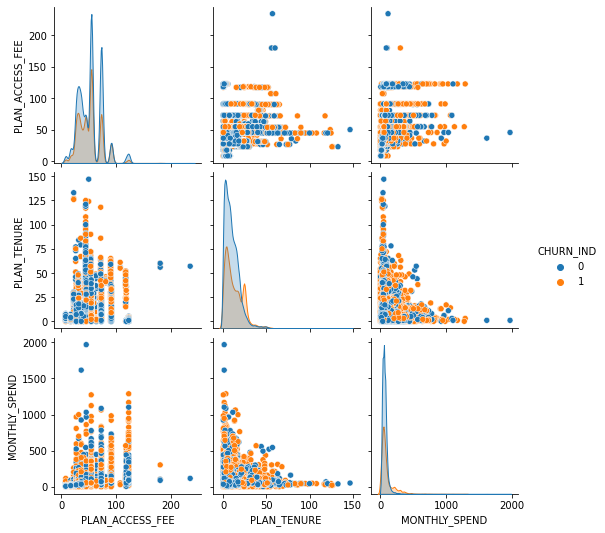

In [54]:
p = sns.pairplot(churn[['PLAN_ACCESS_FEE', 'CHURN_IND', 'PLAN_TENURE', 'MONTHLY_SPEND']], hue='CHURN_IND')

Can the Churn be predicted by how much the customer is spending per month

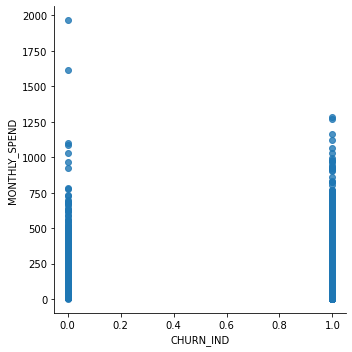

In [55]:
p = sns.lmplot('CHURN_IND', 'MONTHLY_SPEND', churn, height=5, fit_reg=False)

The correlation between both the `CHURN_IND` and `MONTHLY_SPEND`

In [56]:
churn[['CHURN_IND', 'MONTHLY_SPEND']].corr()

,CHURN_IND,MONTHLY_SPEND
CHURN_IND,1.000000,0.187608
MONTHLY_SPEND,0.187608,1.000000


## Linear Regression of Data

In [78]:
feature_cols = ['PLAN_ACCESS_FEE']
X = churn[feature_cols]
y = churn['CHURN_IND'] 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [79]:
print("y = ", model.coef_, "* x + ", model.intercept_) 

y =  [-0.00085367] * x +  0.42886334830899425


## Interpretation

* Intercept is 0.428. Out of all the data, less then half of the users churn based on the `PLAN_ACCESS_FEE`
* An increase in the `PLAN_ACCESS_FEE` will have minimal effect on whether a user churns

## Prediction

The data provided can be used to make a prediction and plot the findings

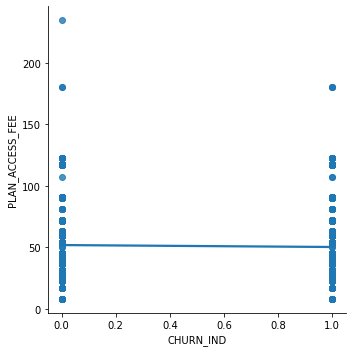

In [98]:
xmin = X.min()
ymin = model.coef_[0] * xmin + model.intercept_
xmax = X.max()
ymax = model.coef_[0] * xmax + model.intercept_

p = sns.lmplot('CHURN_IND', 'PLAN_ACCESS_FEE', churn, height=5)

The predict method can then be used on the model

In [99]:
print("Predicted value for x =", xmin[0], "is", model.predict([xmin]))
yhat = model.predict(X)
yhat

Predicted value for x = 1.02 is [0.32273359]


array([0.38112483, 0.29537545, 0.32543832, ..., 0.28008285, 0.34963268,
       0.28850121])

A measure of the variance of the data can then be derived from the model

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

MSE: 0.21894582990514697
R^2: 0.0753134656719634


## Improve the prediction

More columns can be added to the model to help improve the prediction

The following columns are added:
* `PLAN_ACCESS_FEE`
* `MONTHLY_SPEND`

In [110]:
feature_cols = ['PLAN_ACCESS_FEE', 'MONTHLY_SPEND']
X = churn[feature_cols]
y = churn['CHURN_IND']
 
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [111]:
print("y = ", model.coef_, "* X + ", model.intercept_)

y =  [-0.00352196  0.00168937] * X +  0.4388992628527891


In [112]:
predicted = model.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

MSE: 0.22413261828375214
R^2: 0.0534078035628327


## Interpretation

* Intercept is 0.438. Out of all the data, less then half of the users churn based on all the variables
* An increase in all the columns will have minimal effect on whether a user churns
* Very small multiplier on the `MONTHLY_SPEND`

## Train Test Split

* The data is then splitted for training and testing on the model
* This gives a more accurate representation of the model with the new data

In [113]:
feature_cols = ['PLAN_ACCESS_FEE', 'MONTHLY_SPEND']
X = churn[feature_cols]
y = churn['CHURN_IND']

X_train = X[:30]
y_train = y[:30]
X_test = X[30:]
y_test = y[30:]

The model is then trained

In [114]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 0.6153846153846154
R^2: -1.5999999999999992


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(36964, 2) (9242, 2)


In [116]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 0.22577462741341803
R^2: 0.047932830602643084


Create a prediction based on the model and plot the results

In [123]:
feature_cols = ['PLAN_ACCESS_FEE']
X = churn[feature_cols]
y = churn['CHURN_IND'] 
model = LinearRegression()
model.fit(X, y)
print("y = ", model.coef_, "* X + ", model.intercept_)

y =  [-0.00085367] * X +  0.42886334830899425


Text(0, 0.5, 'predicted CHURN')

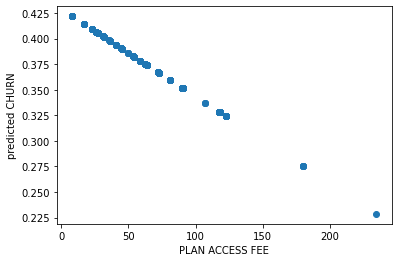

In [124]:
predicted = model.predict(X)
plt.scatter(X, predicted)
plt.xlabel('Plan Access Fee')
plt.ylabel('Predicted Churn')

# Logistic Regression
Predicting the Churn based on the Monthly Spend using Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression

feature_cols = ['MONTHLY_SPEND']
X = churn[feature_cols]
y = churn['CHURN_IND']
logreg = LogisticRegression(C=1e9)
logreg.fit(X, y)

LogisticRegression(C=1000000000.0)

Text(0, 0.5, 'Predicted Churn')

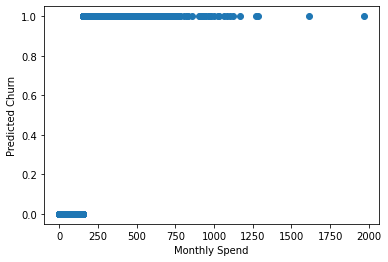

In [148]:
predicted = logreg.predict(X)
plt.scatter(X, predicted)
plt.xlabel('Monthly Spend');plt.ylabel('Predicted Churn')

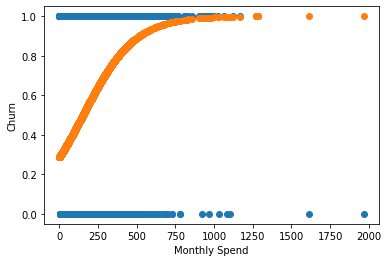

In [149]:
probs = logreg.predict_proba(X)[:, 1] 
plt.scatter(X, y); plt.scatter(X, probs)
plt.xlabel('Monthly Spend');plt.ylabel('Churn')
None

# Findings

It can be visibly noted from the graph above, that as the Monthly Spend increases, the chances of a user Churning increases substantially